<a href="https://colab.research.google.com/github/TiagoDeserth/Ci-ncia-de-Dados/blob/main/Ci%C3%AAncia_de_Dados_Exerc%C3%ADcio_2_em_Dataset_da_Cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula: Regressão Linear (04/11/2022)
##**Enunciado do exercício:**
###*1º ponto* - Selecionar variável de maior correlação com "consumo" e construir a reta de de Regressão achando B1 (beta 1) e B2 (beta 2);
###*2º ponto* - Calcular o Ruído u, também plotar o gráfico de Y_previsto e u²;
###*3º ponto* - Verficiar se a variância de u é constante;
###*4º ponto* - E por fim, dizer quem é R² (R.square).
---
##**Observações para o andamento do exercício:**
###A partir  das análises feitas (contidas no **outro Colab**), é válido ressaltar que a variável com maior correlação com **"consumo"** é a **"temp_max"** (temperatura máxima).

###Adequação:
*   consumo = Variável Y
*   temp_max = Variável X

###**Colab** externo citado: 
[https://colab.research.google.com/drive/1JY9XqNrF7IdYVJvtvp-Pmk4CMCotcBf6?authuser=1#scrollTo=1I7nrbqS_02A&line=1&uniqifier=1](https://)


 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings('ignore') #Filtragem de erros (alertas)

In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv', delimiter=';')

In [ ]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


###Encontrando o 'consumo' previsto (também contido no **outro Colab**)


In [ ]:
X = dados.consumo
Y = sm.add_constant(dados.temp_max)

In [ ]:
resultado_regressao = sm.OLS(X, Y, missing = 'drop').fit()

In [ ]:
dados['Consumo_Previsto'] = resultado_regressao.predict()
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,X2,XY,Consumo_Previsto
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461,1056.25,827482.5,29257.420859
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972,1122.25,970562.0,29912.266443
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814,894.01,921338.6,27554.822341
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799,817.96,852251.4,26703.523082
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900,800.89,817870.0,26507.069407
...,...,...,...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307,795.24,911057.4,26441.584848
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095,712.89,696736.5,25459.316472
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309,580.81,537646.9,23756.717954
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467,501.76,458460.8,22643.480461


#1º ponto

In [ ]:
n = len(dados)
n

365

In [ ]:
SOMA_Y = dados.consumo.sum()
SOMA_Y

9271499

In [ ]:
SOMA_X = dados.temp_max.sum()
SOMA_X

9713.2

In [ ]:
dados['X2'] = dados.temp_max**2
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,X2
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461,1056.25
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972,1122.25
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814,894.01
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799,817.96
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900,800.89


In [ ]:
SOMA_X2 = dados.X2.sum()
SOMA_X2

265267.72

In [ ]:
dados['XY'] = dados.temp_max*dados.consumo
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,X2,XY,Consumo_Previsto
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461,1056.25,827482.5,29257.420859
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972,1122.25,970562.0,29912.266443
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814,894.01,921338.6,27554.822341
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799,817.96,852251.4,26703.523082
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900,800.89,817870.0,26507.069407


In [ ]:
SOMA_XY = dados.XY.sum()
SOMA_XY

251171576.2

In [ ]:
#Excluindo colunas indesejadas: 'X2' e 'XY'
dados.drop(['X2', 'XY'], axis=1, inplace=True)
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,Consumo_Previsto
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461,29257.420859
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972,29912.266443
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814,27554.822341
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799,26703.523082
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900,26507.069407


In [ ]:
#Cálculo final de acordo com a fórmula do Beta 2
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X)**2
beta_2 = numerador/denominador
beta_2

654.8455839988234

In [ ]:
beta_1 = dados.consumo.mean() - beta_2 * dados.temp_max.mean()
beta_1

7974.939379459254

In [ ]:
resultado_regressao.params

const       7974.939379
temp_max     654.845584
dtype: float64

In [ ]:
dados['Consumo_Previsto2'] = beta_1 + beta_2 * dados.temp_max
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,Consumo_Previsto,Consumo_Previsto2
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461,29257.420859,29257.420859
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972,29912.266443,29912.266443
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814,27554.822341,27554.822341
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799,26703.523082,26703.523082
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900,26507.069407,26507.069407
...,...,...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307,26441.584848,26441.584848
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095,25459.316472,25459.316472
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309,23756.717954,23756.717954
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467,22643.480461,22643.480461


#2º ponto

In [ ]:
dados['u'] = dados.consumo - dados.Consumo_Previsto
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo,Consumo_Previsto,Consumo_Previsto2,u
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461,29257.420859,29257.420859,-3796.420859
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972,29912.266443,29912.266443,-940.266443
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814,27554.822341,27554.822341,3259.177659
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799,26703.523082,26703.523082,3095.476918
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900,26507.069407,26507.069407,2392.930593


In [ ]:
#Melhorando a visualização excluindo mais colunas indesejadas: 'temp_media', 'temp_min', 'chuva', 'fds', e 'Consumo_Previsto2'
dados.drop(['temp_media', 'temp_min', 'chuva', 'fds', 'Consumo_Previsto2'], axis=1, inplace=True)
dados.head()

,data,temp_max,consumo,Consumo_Previsto,u
0,01/01/2015,32.5,25461,29257.420859,-3796.420859
1,02/01/2015,33.5,28972,29912.266443,-940.266443
2,03/01/2015,29.9,30814,27554.822341,3259.177659
3,04/01/2015,28.6,29799,26703.523082,3095.476918
4,05/01/2015,28.3,28900,26507.069407,2392.930593


#3º ponto

####*Através da plotagem do gráfico, podemos observar que talvez não haja heterocedasticidade nos dados.*

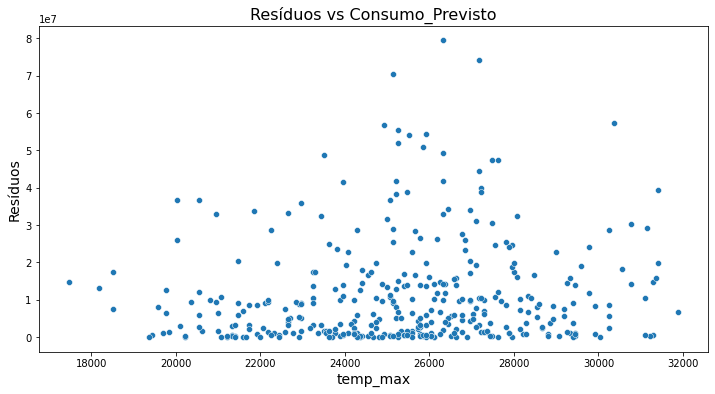

In [ ]:
ax = sns.scatterplot(x=dados.Consumo_Previsto, y=dados.u**2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Consumo_Previsto', fontsize=16)
ax.set_xlabel('temp_max', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

#4 º ponto

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     255.4
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           6.55e-44
Time:                        19:39:30   Log-Likelihood:                -3482.2
No. Observations:                 365   AIC:                             6968.
Df Residuals:                     363   BIC:                             6976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7974.9394   1104.588      7.220      0.0